In [1]:
# to show an image automatically within the browser without using show()
%matplotlib inline 

import math
import numpy as np # for working with arrays
import pandas as pd # for working with tables
import scipy.stats as stats
import matplotlib.pyplot as plt # for visualization (creating plots)

import statistics as sts # statistic module for variance

In [2]:
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [4]:
df = pd.read_csv('Train_newColumns.csv')

In [5]:
dfnew = df.drop(columns=['Attrition','JobRole','EducationField','BusinessTravel','Department','EnvironmentSatisfaction','Education' ,'Gender','JobInvolvement','JobSatisfaction','MaritalStatus','OverTime','RelationshipSatisfaction','StockOptionLevel', 'WorkLifeBalance' ])

In [6]:
df_1 = dfnew[['MonthlyIncome', 'Stagnation', 'YearsWithCurrManager']]
df_2 = dfnew[['Stagnation', 'YearsAtCompany', 'TotalWorkingYears']]
df_3 = dfnew[['MonthlyIncome', 'TotalWorkingYears', 'Stagnation']]
df_4 = dfnew[['YearsWithCurrManager', 'TotalWorkingYears', 'TrainingTimesLastYear']]
df_5 = dfnew[['MonthlyIncome', 'YearsAtCompany', 'Stagnation']]

data_frames = [df_1, df_2, df_3, df_4, df_5]

In [7]:
to_db_scan = [df_1, df_2, df_3, df_4, df_5]
min_samp = []
epsilon = []
scaled_df = []
scaler = StandardScaler()

for i in range(5, 10):
  min_samp.append(math.pow(2, i))
p = 0.1
for i in range(0, 70):
  epsilon.append(p)
  p+=0.01

for e in to_db_scan:
  scaled_df.append(scaler.fit_transform(e.values))

In [20]:
#1,0.5,128
plot_df_idx = 4
plot_eps = 0.22
plot_mp = 30
to_plot = to_db_scan[plot_df_idx]
columns = []
for c in to_plot.columns:
  columns.append(c)
x = columns[0]
y = columns[1]
z = columns[2]

res = DBSCAN(eps=plot_eps, min_samples=plot_mp).fit(scaled_df[plot_df_idx])
centers = scaler.inverse_transform(res.cluster_centers_)
print(np.unique(res.labels_, return_counts=True))

AttributeError: 'DBSCAN' object has no attribute 'cluster_centers_'

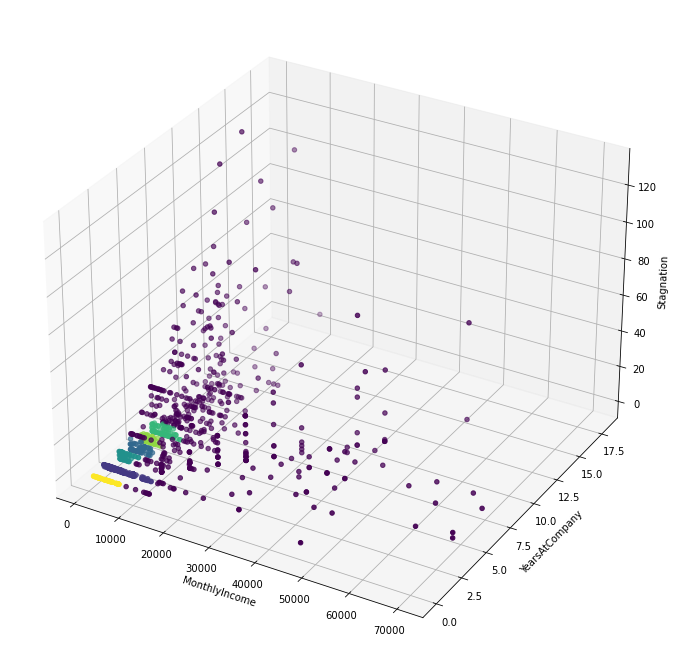

In [19]:
fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')
ax.scatter(to_plot[x],
           to_plot[y],
           to_plot[z],
           c=res.labels_, marker='o')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

In [212]:
results = {}

appl = [scaled_df[0], scaled_df[1]]

for i, e in enumerate(appl):
  results[str(i)] = []

for i, df in enumerate(appl):
  for j, eps in enumerate(epsilon):
    for ms in min_samp:
      results[str(i)].append({
        'res': DBSCAN(eps=eps, min_samples=ms).fit(df),
        'ms': ms,
        'eps': eps
      })
      print("end ", eps, " at iteration ", j)

end  0.1  at iteration  0
end  0.1  at iteration  0
end  0.1  at iteration  0
end  0.1  at iteration  0
end  0.1  at iteration  0
end  0.11  at iteration  1
end  0.11  at iteration  1
end  0.11  at iteration  1
end  0.11  at iteration  1
end  0.11  at iteration  1
end  0.12  at iteration  2
end  0.12  at iteration  2
end  0.12  at iteration  2
end  0.12  at iteration  2
end  0.12  at iteration  2
end  0.13  at iteration  3
end  0.13  at iteration  3
end  0.13  at iteration  3
end  0.13  at iteration  3
end  0.13  at iteration  3
end  0.14  at iteration  4
end  0.14  at iteration  4
end  0.14  at iteration  4
end  0.14  at iteration  4
end  0.14  at iteration  4
end  0.15000000000000002  at iteration  5
end  0.15000000000000002  at iteration  5
end  0.15000000000000002  at iteration  5
end  0.15000000000000002  at iteration  5
end  0.15000000000000002  at iteration  5
end  0.16000000000000003  at iteration  6
end  0.16000000000000003  at iteration  6
end  0.16000000000000003  at iterati

end  0.5000000000000003  at iteration  40
end  0.5000000000000003  at iteration  40
end  0.5100000000000003  at iteration  41
end  0.5100000000000003  at iteration  41
end  0.5100000000000003  at iteration  41
end  0.5100000000000003  at iteration  41
end  0.5100000000000003  at iteration  41
end  0.5200000000000004  at iteration  42
end  0.5200000000000004  at iteration  42
end  0.5200000000000004  at iteration  42
end  0.5200000000000004  at iteration  42
end  0.5200000000000004  at iteration  42
end  0.5300000000000004  at iteration  43
end  0.5300000000000004  at iteration  43
end  0.5300000000000004  at iteration  43
end  0.5300000000000004  at iteration  43
end  0.5300000000000004  at iteration  43
end  0.5400000000000004  at iteration  44
end  0.5400000000000004  at iteration  44
end  0.5400000000000004  at iteration  44
end  0.5400000000000004  at iteration  44
end  0.5400000000000004  at iteration  44
end  0.5500000000000004  at iteration  45
end  0.5500000000000004  at iterat

end  0.21000000000000008  at iteration  11
end  0.21000000000000008  at iteration  11
end  0.21000000000000008  at iteration  11
end  0.22000000000000008  at iteration  12
end  0.22000000000000008  at iteration  12
end  0.22000000000000008  at iteration  12
end  0.22000000000000008  at iteration  12
end  0.22000000000000008  at iteration  12
end  0.2300000000000001  at iteration  13
end  0.2300000000000001  at iteration  13
end  0.2300000000000001  at iteration  13
end  0.2300000000000001  at iteration  13
end  0.2300000000000001  at iteration  13
end  0.2400000000000001  at iteration  14
end  0.2400000000000001  at iteration  14
end  0.2400000000000001  at iteration  14
end  0.2400000000000001  at iteration  14
end  0.2400000000000001  at iteration  14
end  0.2500000000000001  at iteration  15
end  0.2500000000000001  at iteration  15
end  0.2500000000000001  at iteration  15
end  0.2500000000000001  at iteration  15
end  0.2500000000000001  at iteration  15
end  0.2600000000000001  a

end  0.6200000000000004  at iteration  52
end  0.6300000000000004  at iteration  53
end  0.6300000000000004  at iteration  53
end  0.6300000000000004  at iteration  53
end  0.6300000000000004  at iteration  53
end  0.6300000000000004  at iteration  53
end  0.6400000000000005  at iteration  54
end  0.6400000000000005  at iteration  54
end  0.6400000000000005  at iteration  54
end  0.6400000000000005  at iteration  54
end  0.6400000000000005  at iteration  54
end  0.6500000000000005  at iteration  55
end  0.6500000000000005  at iteration  55
end  0.6500000000000005  at iteration  55
end  0.6500000000000005  at iteration  55
end  0.6500000000000005  at iteration  55
end  0.6600000000000005  at iteration  56
end  0.6600000000000005  at iteration  56
end  0.6600000000000005  at iteration  56
end  0.6600000000000005  at iteration  56
end  0.6600000000000005  at iteration  56
end  0.6700000000000005  at iteration  57
end  0.6700000000000005  at iteration  57
end  0.6700000000000005  at iterat

In [213]:
for i, df in enumerate(appl):
  print("data frame ", str(i), ":")
  for e in results[str(i)]:
    print(np.unique(e['res'].labels_, return_counts=True), " for epsilon = " , e['eps'], " and min_p = ", e['ms'])
  print("========================================")

data frame  0 :
(array([-1,  0,  1,  2]), array([736, 163,  72,  42]))  for epsilon =  0.1  and min_p =  32.0
(array([-1,  0]), array([929,  84]))  for epsilon =  0.1  and min_p =  64.0
(array([-1]), array([1013]))  for epsilon =  0.1  and min_p =  128.0
(array([-1]), array([1013]))  for epsilon =  0.1  and min_p =  256.0
(array([-1]), array([1013]))  for epsilon =  0.1  and min_p =  512.0
(array([-1,  0,  1,  2]), array([731, 165,  74,  43]))  for epsilon =  0.11  and min_p =  32.0
(array([-1,  0]), array([906, 107]))  for epsilon =  0.11  and min_p =  64.0
(array([-1]), array([1013]))  for epsilon =  0.11  and min_p =  128.0
(array([-1]), array([1013]))  for epsilon =  0.11  and min_p =  256.0
(array([-1]), array([1013]))  for epsilon =  0.11  and min_p =  512.0
(array([-1,  0,  1,  2,  3,  4]), array([654, 165,  78,  43,  41,  32]))  for epsilon =  0.12  and min_p =  32.0
(array([-1,  0,  1]), array([810, 134,  69]))  for epsilon =  0.12  and min_p =  64.0
(array([-1]), array([1013]

(array([-1,  0,  1]), array([183, 796,  34]))  for epsilon =  0.6200000000000004  and min_p =  32.0
(array([-1,  0]), array([263, 750]))  for epsilon =  0.6200000000000004  and min_p =  64.0
(array([-1,  0]), array([297, 716]))  for epsilon =  0.6200000000000004  and min_p =  128.0
(array([-1,  0]), array([331, 682]))  for epsilon =  0.6200000000000004  and min_p =  256.0
(array([-1]), array([1013]))  for epsilon =  0.6200000000000004  and min_p =  512.0
(array([-1,  0,  1]), array([183, 796,  34]))  for epsilon =  0.6300000000000004  and min_p =  32.0
(array([-1,  0]), array([262, 751]))  for epsilon =  0.6300000000000004  and min_p =  64.0
(array([-1,  0]), array([276, 737]))  for epsilon =  0.6300000000000004  and min_p =  128.0
(array([-1,  0]), array([331, 682]))  for epsilon =  0.6300000000000004  and min_p =  256.0
(array([-1]), array([1013]))  for epsilon =  0.6300000000000004  and min_p =  512.0
(array([-1,  0,  1]), array([183, 796,  34]))  for epsilon =  0.6400000000000005  

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7]), array([432, 200, 183, 102,  26,   6,  26,  34,   4]))  for epsilon =  0.3200000000000002  and min_p =  32.0
(array([-1,  0,  1]), array([819, 102,  92]))  for epsilon =  0.3200000000000002  and min_p =  64.0
(array([-1]), array([1013]))  for epsilon =  0.3200000000000002  and min_p =  128.0
(array([-1]), array([1013]))  for epsilon =  0.3200000000000002  and min_p =  256.0
(array([-1]), array([1013]))  for epsilon =  0.3200000000000002  and min_p =  512.0
(array([-1,  0,  1,  2,  3,  4,  5,  6]), array([408,  67, 225, 173,  91,   6,  37,   6]))  for epsilon =  0.3300000000000002  and min_p =  32.0
(array([-1,  0,  1]), array([811, 102, 100]))  for epsilon =  0.3300000000000002  and min_p =  64.0
(array([-1]), array([1013]))  for epsilon =  0.3300000000000002  and min_p =  128.0
(array([-1]), array([1013]))  for epsilon =  0.3300000000000002  and min_p =  256.0
(array([-1]), array([1013]))  for epsilon =  0.3300000000000002  and min_p =  512

(array([-1]), array([1013]))  for epsilon =  0.7100000000000005  and min_p =  512.0
(array([-1,  0]), array([145, 868]))  for epsilon =  0.7200000000000005  and min_p =  32.0
(array([-1,  0]), array([205, 808]))  for epsilon =  0.7200000000000005  and min_p =  64.0
(array([-1,  0]), array([292, 721]))  for epsilon =  0.7200000000000005  and min_p =  128.0
(array([-1,  0,  1]), array([554, 256, 203]))  for epsilon =  0.7200000000000005  and min_p =  256.0
(array([-1]), array([1013]))  for epsilon =  0.7200000000000005  and min_p =  512.0
(array([-1,  0]), array([141, 872]))  for epsilon =  0.7300000000000005  and min_p =  32.0
(array([-1,  0]), array([197, 816]))  for epsilon =  0.7300000000000005  and min_p =  64.0
(array([-1,  0]), array([262, 751]))  for epsilon =  0.7300000000000005  and min_p =  128.0
(array([-1,  0]), array([527, 486]))  for epsilon =  0.7300000000000005  and min_p =  256.0
(array([-1]), array([1013]))  for epsilon =  0.7300000000000005  and min_p =  512.0
(array(

In [222]:
filtered = []

for i, df in enumerate(appl):
  for idx, e in enumerate(results[str(i)]):
    labels, count = np.unique(e['res'].labels_, return_counts=True)
    if len(count) > 2: # len 0 => solo noise points, len => un solo cluster e noise points
      good_cluster_count = 0
      for punt, s in enumerate(labels):
        if s != -1 and count[punt] > 50:
          good_cluster_count += 1
      if good_cluster_count > 1:
        filtered.append({
            'df': i,
            'eps': e['eps'], 
            'min_samp': e['ms'],
            'labels': labels,
            'count': count, 
            'index': idx
        })

print("========================================")
print("Found ", len(filtered), " potentially good clustering results")
print("========================================")
for e in filtered:
  print(e['df'], "-> (<eps, min_samp> = <", round(e['eps'], 2), ",", e['min_samp'], ">) -> ", len(e['count']))
  

Found  114  potentially good clustering results
0 -> (<eps, min_samp> = < 0.1 , 32.0 >) ->  4
0 -> (<eps, min_samp> = < 0.11 , 32.0 >) ->  4
0 -> (<eps, min_samp> = < 0.12 , 32.0 >) ->  6
0 -> (<eps, min_samp> = < 0.12 , 64.0 >) ->  3
0 -> (<eps, min_samp> = < 0.13 , 32.0 >) ->  6
0 -> (<eps, min_samp> = < 0.13 , 64.0 >) ->  3
0 -> (<eps, min_samp> = < 0.14 , 32.0 >) ->  5
0 -> (<eps, min_samp> = < 0.14 , 64.0 >) ->  3
0 -> (<eps, min_samp> = < 0.15 , 32.0 >) ->  5
0 -> (<eps, min_samp> = < 0.15 , 64.0 >) ->  3
0 -> (<eps, min_samp> = < 0.16 , 32.0 >) ->  6
0 -> (<eps, min_samp> = < 0.16 , 64.0 >) ->  3
0 -> (<eps, min_samp> = < 0.17 , 32.0 >) ->  6
0 -> (<eps, min_samp> = < 0.17 , 64.0 >) ->  4
0 -> (<eps, min_samp> = < 0.18 , 32.0 >) ->  6
0 -> (<eps, min_samp> = < 0.18 , 64.0 >) ->  4
0 -> (<eps, min_samp> = < 0.19 , 32.0 >) ->  6
0 -> (<eps, min_samp> = < 0.19 , 64.0 >) ->  4
0 -> (<eps, min_samp> = < 0.2 , 32.0 >) ->  6
0 -> (<eps, min_samp> = < 0.2 , 64.0 >) ->  4
0 -> (<eps, min

In [256]:
type(res)

sklearn.cluster._dbscan.DBSCAN

In [257]:
res.labels_

array([ 3, -1, -1, ..., -1,  0,  0])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices